In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
w_init = 0.5
n = 144
m = 50
iters = 500
alpha = 1
eta = alpha / m

In [89]:
w = w_init * np.random.randn(n) / np.sqrt(n)
w_history = np.zeros((iters + 1, n))
w_history[0] = w

for iter in range(1, iters + 1):
    phi_w = np.copy(w)
    phi_w[phi_w < 0] = 0
    phi_w_mask = np.copy(phi_w)
    phi_w_mask[m:] = 0
    sq_norm = np.dot(w, w)
    sq_norm_phi = np.dot(phi_w_mask, phi_w_mask)

    w += eta * (phi_w_mask * (2 - sq_norm) - w * sq_norm_phi)
    w_history[iter] = w

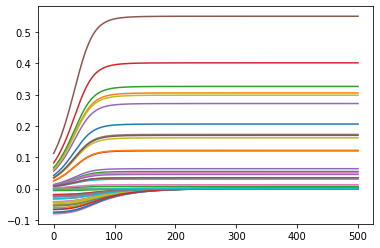

0.5508324305450669


In [90]:
for i in range(m):
    plt.plot(np.arange(iters + 1), w_history[:, i])
plt.show()

print(np.max(w_history[iters]))


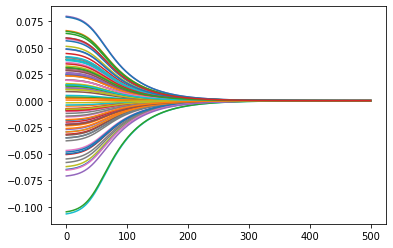

In [91]:
for i in range(m, n):
    plt.plot(np.arange(iters + 1), w_history[:, i])
plt.show()

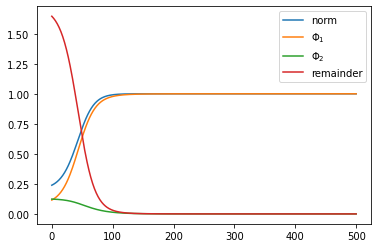

In [101]:
X = np.copy(w_history)
S = np.nonzero(w_history[0] > 0)[0]
S_comp = np.array([i for i in range(n) if i not in S])
norm = np.sum(np.square(X), axis=1)
Phi_1 = np.sum(np.square(X[:, S]), axis=1)
Phi_2 = np.sum(np.square(X[:, S_comp]), axis=1)
plt.plot(np.arange(iters + 1), norm, label="norm")
plt.plot(np.arange(iters + 1), Phi_1, label=r"$\Phi_1$")
plt.plot(np.arange(iters + 1), Phi_2, label=r"$\Phi_2$")
plt.plot(np.arange(iters + 1), 2 - 2 * Phi_1 - Phi_2, label="remainder")
plt.legend()
plt.show()

In [93]:
Y = X[:, ~S]
print(Y.shape)

(501, 73)


In [97]:
len(S_comp)

71